In [2]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import seaborn as sns

In [3]:
data = pd.read_csv( 'data_big.csv')
data

,Unnamed: 0,material_id,elements,formula_pretty_reduced,formula,num_elements,chemsys,spacegroup_symbol,spacegroup_number,fav,...,930,940,950,960,970,980,990,first_f_i,first_f_a,relative_w
0,0,mp-10103,"['Li', 'F', 'Al', 'Yb']",LiYbAlF6,Li2 Yb2 Al2 F12,4,Al-F-Li-Yb,P-31c,163,11.477275,...,10.296407,10.296935,10.297452,10.297958,10.298454,10.298939,10.299414,0.042794,0.042794,1.0
1,1,mp-10182,"['Li', 'P', 'Zn']",LiZnP,Li4 Zn4 P4,3,Li-P-Zn,F-43m,216,10.767147,...,9.911096,9.911466,9.911828,9.912183,9.912530,9.912870,9.913203,0.025242,0.025242,1.0
2,2,mp-10250,"['Li', 'F', 'Ba']",BaLiF3,Ba1 Li1 F3,3,Ba-F-Li,Pm-3m,221,7.149976,...,6.206870,6.207124,6.207372,6.207615,6.207853,6.208087,6.208315,0.030784,0.030784,1.0
3,3,mp-10251,"['Li', 'O', 'Dy']",LiDyO2,Li4 Dy4 O8,3,Dy-Li-O,P2_1/c,14,11.573993,...,8.826162,8.827215,8.828246,8.829255,8.830243,8.831211,8.832159,0.084645,0.678670,1.0
4,4,mp-10485,"['Li', 'Sb', 'Ba']",BaLiSb,Ba2 Li2 Sb2,3,Ba-Li-Sb,P6_3/mmc,194,2.543602,...,2.230388,2.230418,2.230448,2.230477,2.230505,2.230533,2.230561,0.020693,0.020693,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,mp-989579,"['Rb', 'Li', 'Tl', 'Cl']",Rb2LiTlCl6,Rb8 Li4 Tl4 Cl24,4,Cl-Li-Rb-Tl,Fm-3m,225,6.337484,...,5.925998,5.926108,5.926215,5.926320,5.926423,5.926523,5.926622,0.027749,1.153376,1.0
869,869,mp-989583,"['Rb', 'Li', 'In', 'Cl']",Rb2LiInCl6,Rb8 Li4 In4 Cl24,4,Cl-In-Li-Rb,Fm-3m,225,6.227338,...,5.702704,5.702835,5.702964,5.703089,5.703213,5.703333,5.703451,0.000556,0.735833,1.0
870,870,mp-9912,"['Li', 'P', 'Ce']",Li2CeP2,Li2 Ce1 P2,3,Ce-Li-P,P-3m1,164,9.743440,...,9.148538,9.148775,9.149008,9.149235,9.149458,9.149676,9.149890,0.024268,0.024268,1.0
871,871,mp-9915,"['Li', 'Be', 'P']",LiBeP,Li2 Be2 P2,3,Be-Li-P,P4/nmm,129,8.642599,...,8.085976,8.086170,8.086361,8.086547,8.086730,8.086909,8.087084,0.038148,0.038148,1.0


In [25]:
#import temperature dependent and independent phonon ban centre (average frequency) data

#fav = temperature independent
fav = data['fav'].tolist()

#fav_RT = temperature dependent (room temperature)
fav_RT = data['298'].tolist()

In [5]:
#First frequency that have non zero Li PDOS - two methods for dealing with imaginary frequencies

#ignore imaginary frequencies
first_f_i = data['first_f_i'].tolist()

#take absolute values
first_f_a = data['first_f_a'].tolist()

In [6]:
#Create a vector of phonon band centres at different temperatures for clustering
T = data.iloc[:, 12:111]
sample = []
for i in [*range(0,872)]:
    sample.append(T.iloc[i,:].tolist())

In [7]:
T = data.iloc[:, 12:111]
T

,20,30,40,50,60,70,80,90,100,110,...,910,920,930,940,950,960,970,980,990,first_f_i
0,6.594447,8.117977,8.803789,9.177639,9.409495,9.566243,9.678856,9.763475,9.829285,9.881878,...,10.295315,10.295867,10.296407,10.296935,10.297452,10.297958,10.298454,10.298939,10.299414,0.042794
1,6.943827,8.228960,8.787715,9.083043,9.261969,9.380870,9.465202,9.527955,9.576391,9.614864,...,9.910330,9.910717,9.911096,9.911466,9.911828,9.912183,9.912530,9.912870,9.913203,0.025242
2,4.946772,5.392138,5.614451,5.745679,5.831648,5.892096,5.936820,5.971206,5.998442,6.020537,...,6.206345,6.206610,6.206870,6.207124,6.207372,6.207615,6.207853,6.208087,6.208315,0.030784
3,4.835827,5.860103,6.531471,6.984967,7.303822,7.537193,7.714109,7.852252,7.962811,8.053138,...,8.823985,8.825086,8.826162,8.827215,8.828246,8.829255,8.830243,8.831211,8.832159,0.084645
4,2.097113,2.143275,2.166012,2.179578,2.188594,2.195020,2.199832,2.203568,2.206554,2.208994,...,2.230325,2.230357,2.230388,2.230418,2.230448,2.230477,2.230505,2.230533,2.230561,0.020693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,5.032588,5.452635,5.612081,5.693772,5.742986,5.775750,5.799085,5.816530,5.830056,5.840846,...,5.925772,5.925886,5.925998,5.926108,5.926215,5.926320,5.926423,5.926523,5.926622,0.027749
869,4.678269,5.149744,5.333075,5.428080,5.485695,5.524218,5.551738,5.572358,5.588374,5.601168,...,5.702432,5.702569,5.702704,5.702835,5.702964,5.703089,5.703213,5.703333,5.703451,0.000556
870,7.127617,8.063855,8.433020,8.622679,8.736463,8.811805,8.865182,8.904896,8.935559,8.959929,...,9.148047,9.148295,9.148538,9.148775,9.149008,9.149235,9.149458,9.149676,9.149890,0.024268
871,6.922704,7.391272,7.596753,7.711569,7.784596,7.835002,7.871823,7.899866,7.921917,7.939702,...,8.085574,8.085777,8.085976,8.086170,8.086361,8.086547,8.086730,8.086909,8.087084,0.038148


In [8]:
sample

[[6.5944473239562935,
  8.117977440933647,
  8.803788718812761,
  9.177639328345672,
  9.40949541139246,
  9.56624330568048,
  9.67885564144853,
  9.763474702385356,
  9.829285422401604,
  9.881878147213891,
  9.92484132202727,
  9.96057968412912,
  9.990763000330404,
  10.016585771418386,
  10.038924447181191,
  10.05843630012767,
  10.075623680691672,
  10.090876981214294,
  10.10450408991833,
  10.11675103360803,
  10.12781673200484,
  10.137863730594118,
  10.14702613285896,
  10.155415547465992,
  10.16312560579171,
  10.170235434671708,
  10.176812355386849,
  10.18291400253355,
  10.188590003020307,
  10.193883318025986,
  10.198831324199396,
  10.203466691289218,
  10.207818099509662,
  10.211910829740024,
  10.215767252075755,
  10.219407232565317,
  10.222848473667815,
  10.226106800687395,
  10.229196403918758,
  10.232130044285906,
  10.234919228732558,
  10.237574360426953,
  10.24010486789861,
  10.242519316473295,
  10.244825504771992,
  10.247030548556769,
  10.24914095

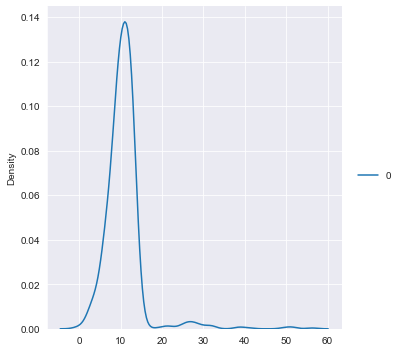

In [9]:
#Look at distribution for temperature independent phonon band centre
fav_graph = np.array(fav)
fav_graph = fav_graph.reshape(-1,1)
sns.displot(fav_graph, kind="kde")

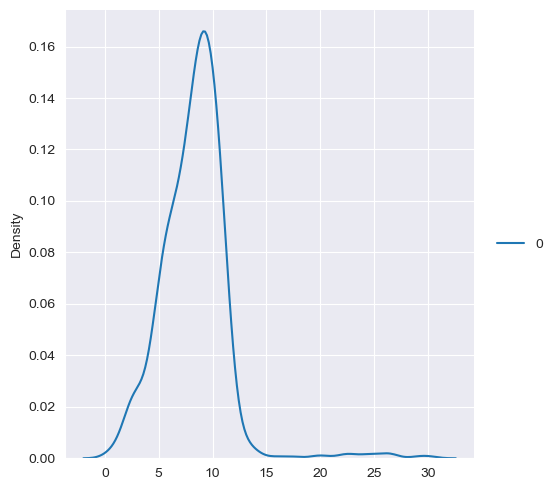

In [10]:
#Look at distribution for temperature dependent phonon band centre at room temperature
favRT_graph = np.array(fav_RT)
favRT_graph = favRT_graph.reshape(-1,1)
sns.displot(favRT_graph, kind="kde")

In [11]:
#Some known good examples of species with high conductivities
fast_ion = pd.DataFrame()
fast_ion = pd.concat([fast_ion,data.iloc[122],data.iloc[138],data.iloc[18],data.iloc[860]],axis=1)
fast_ion

,122,138,18,860
Unnamed: 0,122,138,18,860
material_id,mp-2251,mp-2341,mp-1138,mp-985583
elements,"['Li', 'N']","['Li', 'N']","['Li', 'F']","['Li', 'P', 'S']"
formula_pretty_reduced,Li3N,Li3N,LiF,Li3PS4
formula,Li3 N1,Li6 N2,Li4 F4,Li12 P4 S16
...,...,...,...,...
980,8.466331,6.771993,10.569599,6.196865
990,8.4676,6.773616,10.57005,6.198055
first_f_i,0.100928,0.004068,0.036285,0.073852
first_f_a,2.823081,2.387688,0.036285,2.896208


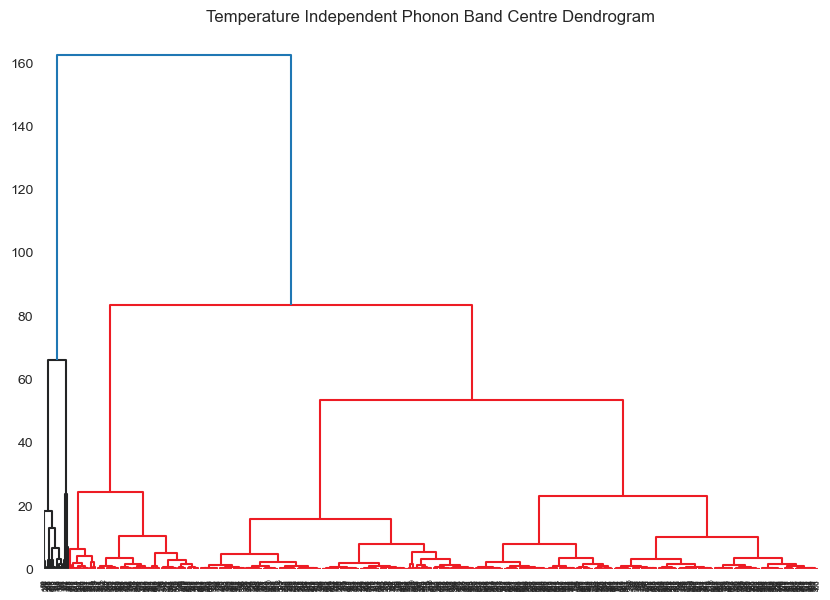

In [24]:
#Perform the Hierarchical Clustering
#temperature independent - clusters_1

plt.figure(figsize=(10, 7))
plt.title("Temperature Independent Phonon Band Centre Dendrogram")

fav_graph = np.array(fav)
fav_graph = fav_graph.reshape(-1,1)
selected_data = fav_graph
clusters_1 = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
#optional: set color for links
#shc.set_link_color_palette(['#232425','#ed1c24','#2b3980'])
shc.dendrogram(clusters_1)
plt.show()

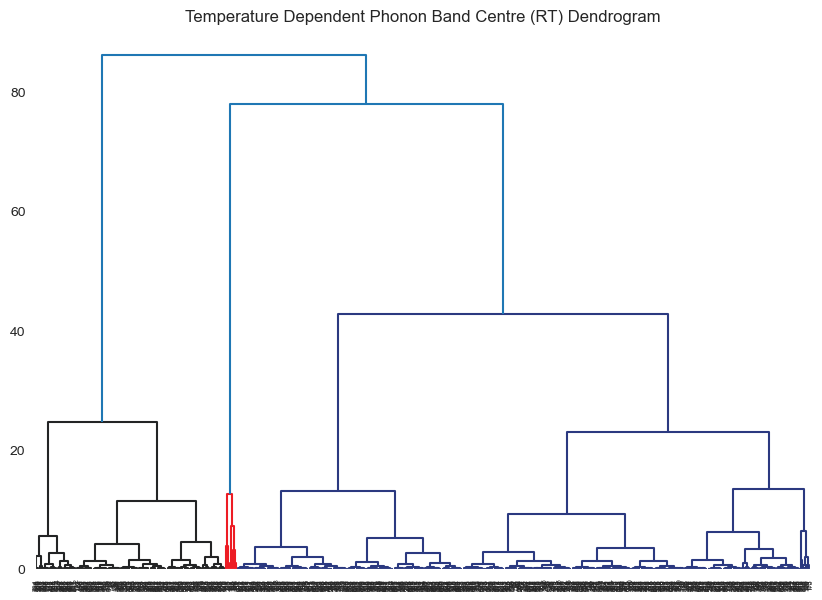

In [13]:
#Perform the Hierarchical Clustering
#temperature dependent (room temperature) - clusters_2
plt.figure(figsize=(10, 7))
plt.title("Temperature Dependent Phonon Band Centre (RT) Dendrogram")

favRT_graph = np.array(fav_RT)
favRT_graph = favRT_graph.reshape(-1,1)
selected_data = favRT_graph
clusters_2 = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(clusters_2)
plt.show()

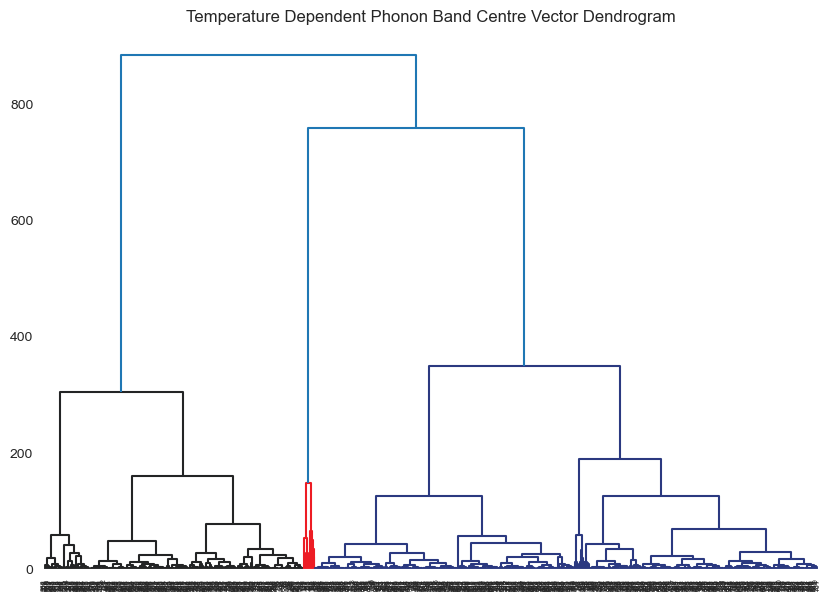

In [14]:
#Perform the Hierarchical Clustering
#temperature dependent (vector of phonon band centres at different temperatures)
plt.figure(figsize=(10, 7))
plt.title("Temperature Dependent Phonon Band Centre Vector Dendrogram")

selected_data = sample
clusters_3 = shc.linkage(selected_data,
                         method='ward',
                         metric="euclidean")
shc.dendrogram(clusters_3)
plt.show()

height of that horizontal line tells you about the distance at which this label was merged into another label or cluster

check the Cophenetic Correlation Coefficient , compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances

In [15]:
c, coph_dists = cophenet(clusters_1, pdist(fav_graph))
c

0.7754331898328172

In [16]:
c, coph_dists = cophenet(clusters_2, pdist(favRT_graph))
c

0.5786894511210923

In [17]:
c, coph_dists = cophenet(clusters_3, pdist(sample))
c

0.5308048068380804

In [18]:
def var_n_clusters (mini, maxi, column):
    '''give a list of variance with different number of clusters used in Hierarchical Clustering'''
    
    temp = pd.DataFrame(data[column])
    val = np.array(data[column])
    val = val.reshape(-1, 1)
    n_range = [*range(mini, maxi+1)]
    store = pd.DataFrame(data = n_range, columns = ['n_clusters'])
    store['sum_var']=np.nan
    
    for n in n_range:
        clustering_model = AgglomerativeClustering(n, affinity='euclidean', linkage='ward').fit(val)
        label = clustering_model.labels_
        label = pd.DataFrame(label)
        label.columns = ['label']
        temp = pd.concat([temp, label], axis = 1)
        record = pd.DataFrame(data = [*range(0,n)])
        for label in [*range(0,n)]:
            record.loc[label,1] = temp.loc[temp['label']== label][column].var()
        record.columns = ['label','variance']
        sum_var = record['variance'].sum()
        index = store.index[store['n_clusters'] == n].tolist()
        store.at[index[0],'sum_var'] = sum_var
        temp = temp.drop('label', axis=1)
    
    return store

   n_clusters     sum_var
0           2  101.917600
1           3  100.598242
2           4   69.215499
3           5   67.953446
4           6   66.963717
5           7   26.749009
6           8   26.336803
7           9   20.924848
8          10   20.726782


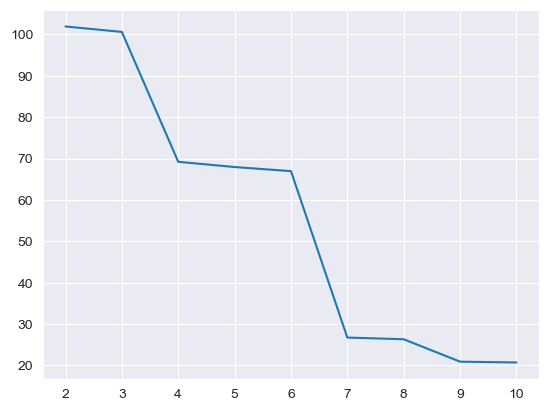

In [19]:
fav_var = var_n_clusters(2,10,'fav')
plt.plot(fav_var['n_clusters'],fav_var['sum_var'])
print(fav_var)

   n_clusters    sum_var
0           2   9.001525
1           3  14.139082
2           4  13.449615
3           5  12.542887
4           6  12.586185
5           7  14.115381
6           8  13.894658
7           9  10.510499
8          10  10.296550


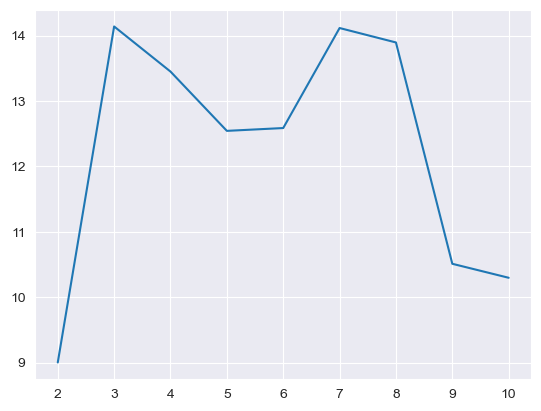

In [20]:
favT_var = var_n_clusters(2,10,'298')
plt.plot(favT_var['n_clusters'],favT_var['sum_var'])
print(favT_var)

In [21]:
#Silhouette analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def silhouette_for_clusters (range_n_clusters, sample, agglomerative = False, kmeans = False, spectral = False):
    '''calculate silhouette score for different number of clusters and plot graphs for comparing
    range_n_clusters = a list of integer
    sample = a list of value to perform clustering on
    method = agglomerative or kmeans or spectral'''

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(sample) + (n_clusters + 1) * 10])

        if agglomerative is True:
            clusterer = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward').fit(sample)
            cluster_labels = clusterer.labels_

        elif kmeans is True:
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.fit_predict(sample)

        elif spectral is True:
            clusterer = SpectralClustering(n_clusters=n_clusters, random_state=10)
            cluster_labels = clusterer.labels_

        elif agglomerative is False and kmeans is False and spectral is False:
            raise Exception("one method is needed to be True")

        elif agglomerative is True and kmeans is True and spectral is True:
            raise Exception("one method is needed to be False")


        silhouette_avg = silhouette_score(sample, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(sample, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):

            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")


        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            sample[:][0], sample[:][-1], marker=".", s=30, lw=0, alpha=0.7, c="red", edgecolor="k"
        )

        if kmeans is True:
            centers = clusterer.cluster_centers_
            ax2.scatter(
                centers[:, 0],
                centers[:, -1],
                marker="o",
                c="white",
                alpha=1,
                s=200,
                edgecolor="k",
            )

            for i, c in enumerate(centers):
                ax2.scatter(c[0], c[-1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5332462950154763
For n_clusters = 3 The average silhouette_score is : 0.5854083651176343
For n_clusters = 4 The average silhouette_score is : 0.5003971153692197
For n_clusters = 5 The average silhouette_score is : 0.5017181193645502
For n_clusters = 6 The average silhouette_score is : 0.4875737282383325


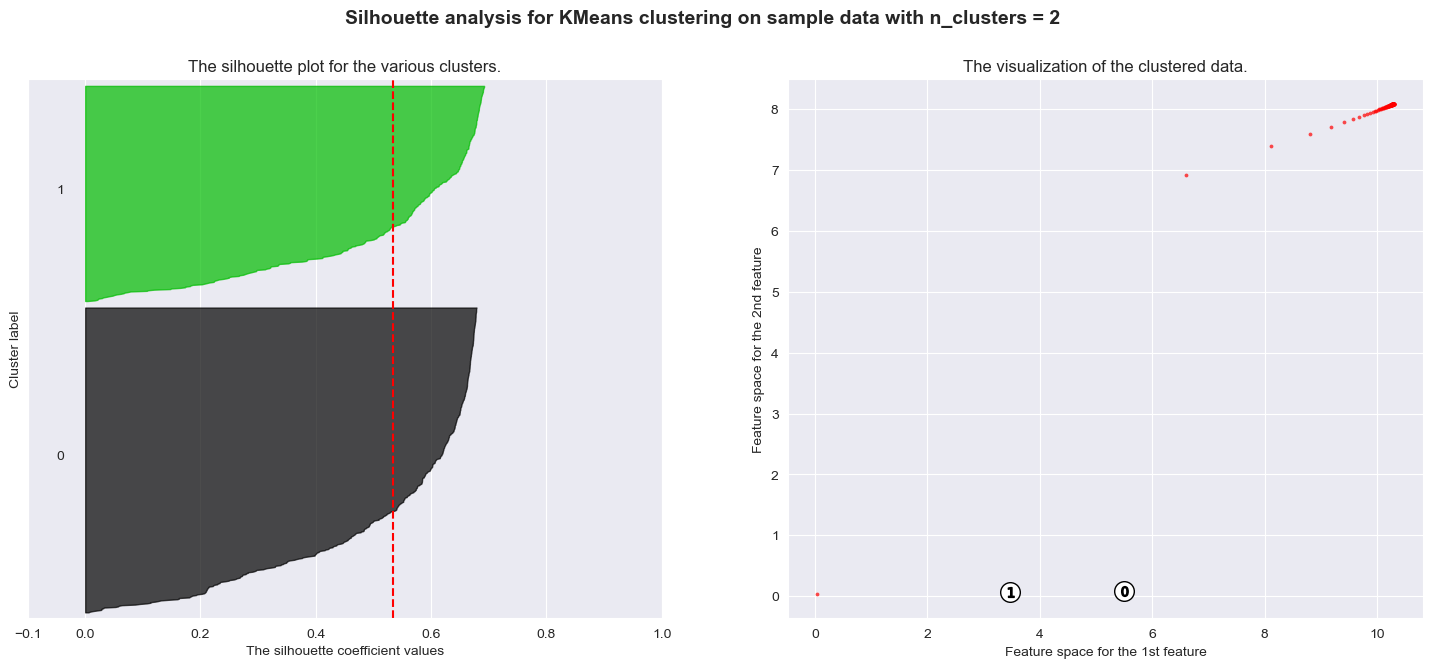

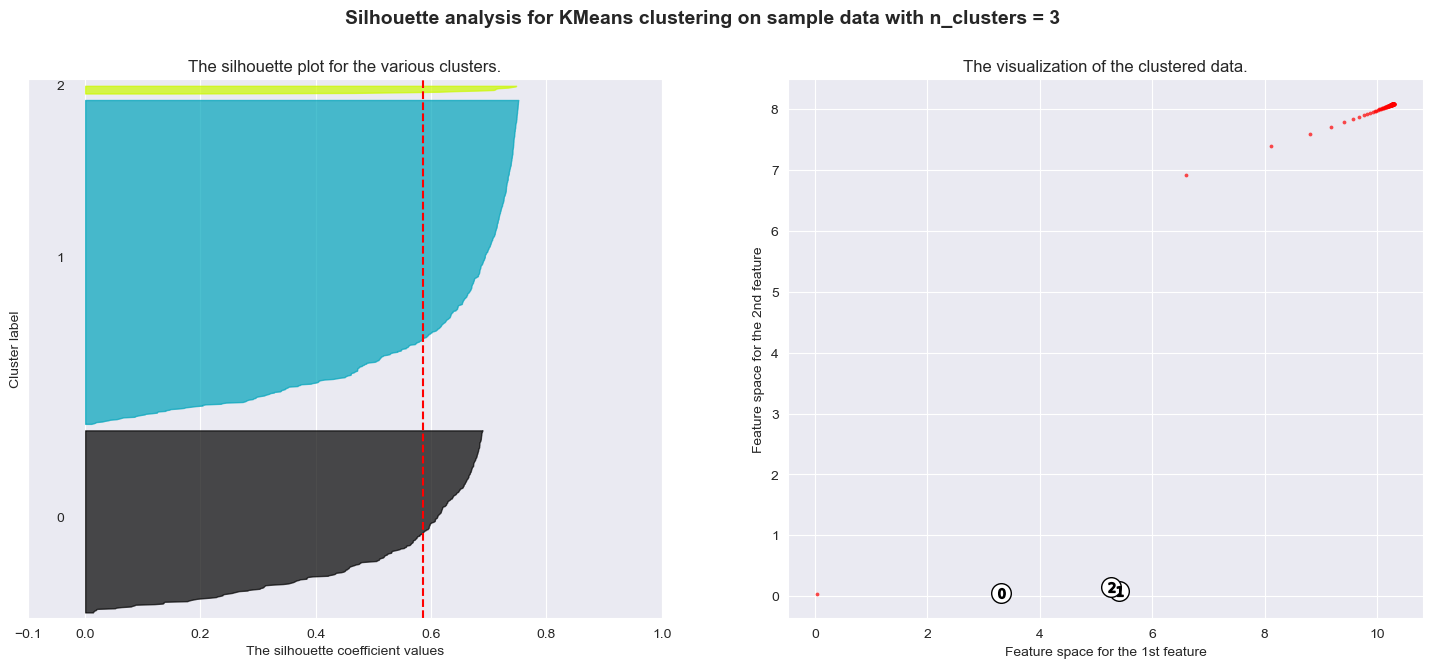

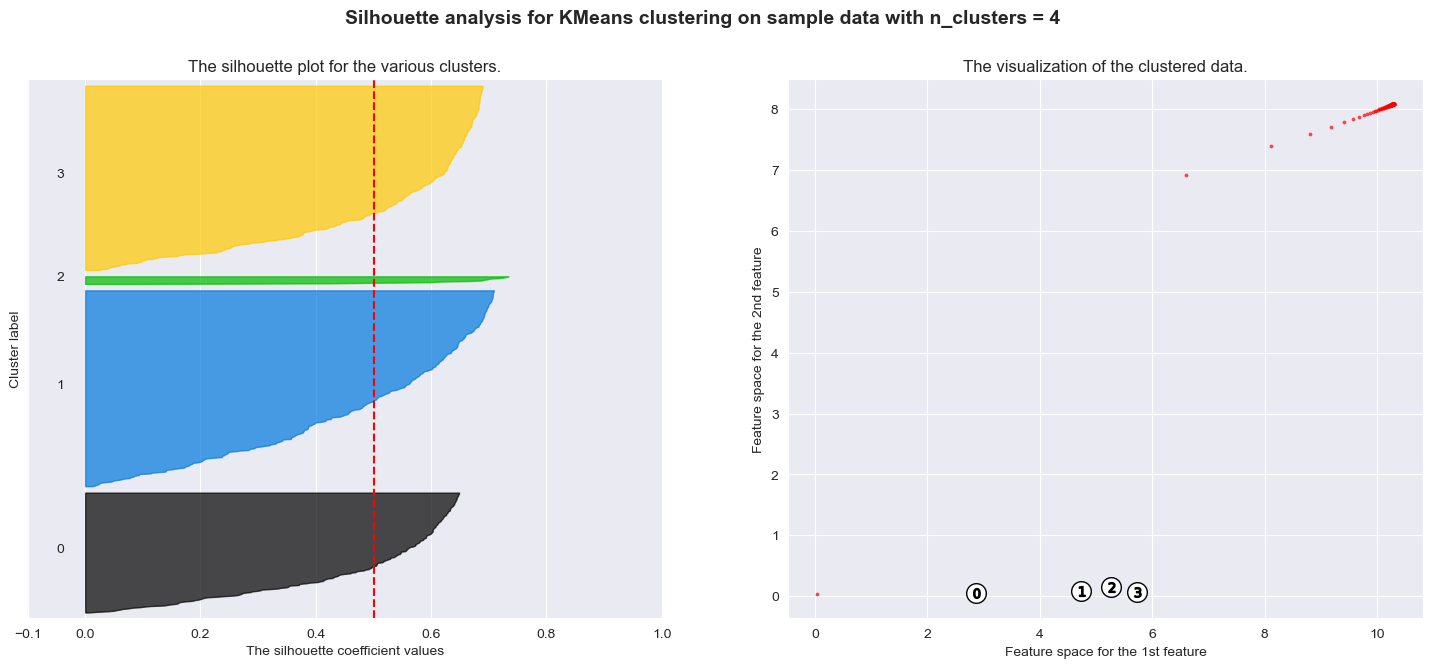

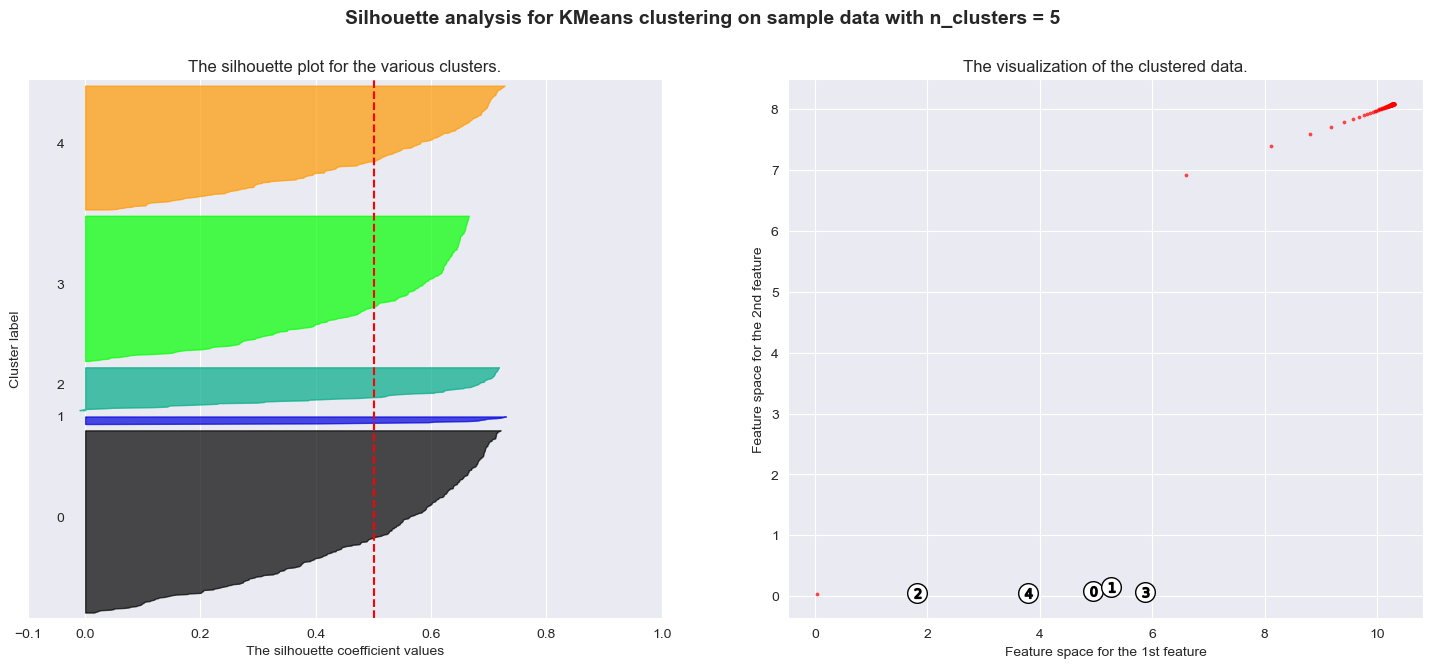

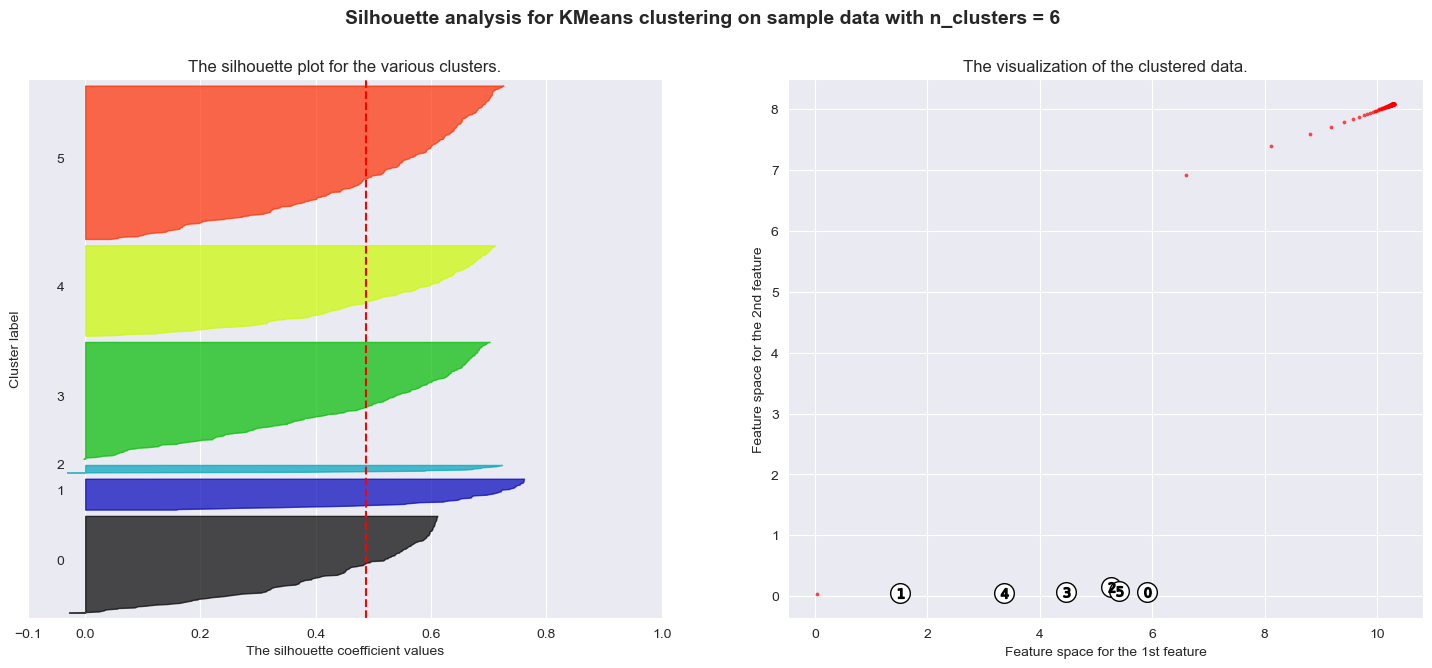

In [22]:
#example of performing the silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

silhouette_for_clusters(range_n_clusters, sample, kmeans = True)

Two examples for performing hierarchical clustering with known optimal number of clusters input.
The result labels are added to a new column in the dataframe

In [27]:
#Temperature independent phonon band centre with optimal no of clusters = 3
clustering_model_1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_model_1.fit(np.array(fav).reshape(-1,1))
res_1 = clustering_model_1.labels_
res_1 = pd.DataFrame(res_1)
res_1.columns = ['res_fav']
data = pd.concat([data, res_1], axis = 1)
data

,Unnamed: 0,material_id,elements,formula_pretty_reduced,formula,num_elements,chemsys,spacegroup_symbol,spacegroup_number,fav,...,940,950,960,970,980,990,first_f_i,first_f_a,relative_w,res_fav
0,0,mp-10103,"['Li', 'F', 'Al', 'Yb']",LiYbAlF6,Li2 Yb2 Al2 F12,4,Al-F-Li-Yb,P-31c,163,11.477275,...,10.296935,10.297452,10.297958,10.298454,10.298939,10.299414,0.042794,0.042794,1.0,1
1,1,mp-10182,"['Li', 'P', 'Zn']",LiZnP,Li4 Zn4 P4,3,Li-P-Zn,F-43m,216,10.767147,...,9.911466,9.911828,9.912183,9.912530,9.912870,9.913203,0.025242,0.025242,1.0,1
2,2,mp-10250,"['Li', 'F', 'Ba']",BaLiF3,Ba1 Li1 F3,3,Ba-F-Li,Pm-3m,221,7.149976,...,6.207124,6.207372,6.207615,6.207853,6.208087,6.208315,0.030784,0.030784,1.0,2
3,3,mp-10251,"['Li', 'O', 'Dy']",LiDyO2,Li4 Dy4 O8,3,Dy-Li-O,P2_1/c,14,11.573993,...,8.827215,8.828246,8.829255,8.830243,8.831211,8.832159,0.084645,0.678670,1.0,1
4,4,mp-10485,"['Li', 'Sb', 'Ba']",BaLiSb,Ba2 Li2 Sb2,3,Ba-Li-Sb,P6_3/mmc,194,2.543602,...,2.230418,2.230448,2.230477,2.230505,2.230533,2.230561,0.020693,0.020693,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,mp-989579,"['Rb', 'Li', 'Tl', 'Cl']",Rb2LiTlCl6,Rb8 Li4 Tl4 Cl24,4,Cl-Li-Rb-Tl,Fm-3m,225,6.337484,...,5.926108,5.926215,5.926320,5.926423,5.926523,5.926622,0.027749,1.153376,1.0,2
869,869,mp-989583,"['Rb', 'Li', 'In', 'Cl']",Rb2LiInCl6,Rb8 Li4 In4 Cl24,4,Cl-In-Li-Rb,Fm-3m,225,6.227338,...,5.702835,5.702964,5.703089,5.703213,5.703333,5.703451,0.000556,0.735833,1.0,2
870,870,mp-9912,"['Li', 'P', 'Ce']",Li2CeP2,Li2 Ce1 P2,3,Ce-Li-P,P-3m1,164,9.743440,...,9.148775,9.149008,9.149235,9.149458,9.149676,9.149890,0.024268,0.024268,1.0,1
871,871,mp-9915,"['Li', 'Be', 'P']",LiBeP,Li2 Be2 P2,3,Be-Li-P,P4/nmm,129,8.642599,...,8.086170,8.086361,8.086547,8.086730,8.086909,8.087084,0.038148,0.038148,1.0,1


In [ ]:
#data = data.drop('res_fav', axis = 1)

In [28]:
#Temperature dependent phonon band centre with optimal no of clusters = 2
clustering_model_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clustering_model_2.fit(np.array(fav_RT).reshape(-1,1))
res_2 = clustering_model_2.labels_
res_2 = pd.DataFrame(res_2)
res_2.columns = ['res_favRT']
data = pd.concat([data, res_2], axis = 1)
data

,Unnamed: 0,material_id,elements,formula_pretty_reduced,formula,num_elements,chemsys,spacegroup_symbol,spacegroup_number,fav,...,950,960,970,980,990,first_f_i,first_f_a,relative_w,res_fav,res_favRT
0,0,mp-10103,"['Li', 'F', 'Al', 'Yb']",LiYbAlF6,Li2 Yb2 Al2 F12,4,Al-F-Li-Yb,P-31c,163,11.477275,...,10.297452,10.297958,10.298454,10.298939,10.299414,0.042794,0.042794,1.0,1,0
1,1,mp-10182,"['Li', 'P', 'Zn']",LiZnP,Li4 Zn4 P4,3,Li-P-Zn,F-43m,216,10.767147,...,9.911828,9.912183,9.912530,9.912870,9.913203,0.025242,0.025242,1.0,1,0
2,2,mp-10250,"['Li', 'F', 'Ba']",BaLiF3,Ba1 Li1 F3,3,Ba-F-Li,Pm-3m,221,7.149976,...,6.207372,6.207615,6.207853,6.208087,6.208315,0.030784,0.030784,1.0,2,1
3,3,mp-10251,"['Li', 'O', 'Dy']",LiDyO2,Li4 Dy4 O8,3,Dy-Li-O,P2_1/c,14,11.573993,...,8.828246,8.829255,8.830243,8.831211,8.832159,0.084645,0.678670,1.0,1,0
4,4,mp-10485,"['Li', 'Sb', 'Ba']",BaLiSb,Ba2 Li2 Sb2,3,Ba-Li-Sb,P6_3/mmc,194,2.543602,...,2.230448,2.230477,2.230505,2.230533,2.230561,0.020693,0.020693,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,868,mp-989579,"['Rb', 'Li', 'Tl', 'Cl']",Rb2LiTlCl6,Rb8 Li4 Tl4 Cl24,4,Cl-Li-Rb-Tl,Fm-3m,225,6.337484,...,5.926215,5.926320,5.926423,5.926523,5.926622,0.027749,1.153376,1.0,2,1
869,869,mp-989583,"['Rb', 'Li', 'In', 'Cl']",Rb2LiInCl6,Rb8 Li4 In4 Cl24,4,Cl-In-Li-Rb,Fm-3m,225,6.227338,...,5.702964,5.703089,5.703213,5.703333,5.703451,0.000556,0.735833,1.0,2,1
870,870,mp-9912,"['Li', 'P', 'Ce']",Li2CeP2,Li2 Ce1 P2,3,Ce-Li-P,P-3m1,164,9.743440,...,9.149008,9.149235,9.149458,9.149676,9.149890,0.024268,0.024268,1.0,1,0
871,871,mp-9915,"['Li', 'Be', 'P']",LiBeP,Li2 Be2 P2,3,Be-Li-P,P4/nmm,129,8.642599,...,8.086361,8.086547,8.086730,8.086909,8.087084,0.038148,0.038148,1.0,1,0


In [ ]:
#data = data.drop('res_2', axis = 1)

Save the result dataframe to a csv file

In [29]:
data.to_csv('clustering_big.csv')